<a href="https://colab.research.google.com/github/giuliovv/tfest/blob/main/examples/tfest_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install tfest

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# import os
# os.chdir("..")
import tfest

from scipy import signal

In [3]:
s1 = signal.lti([1], [1, 1])

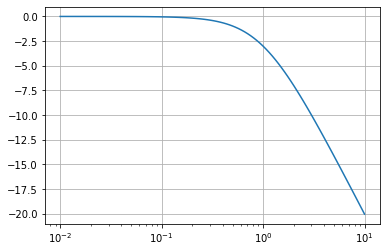

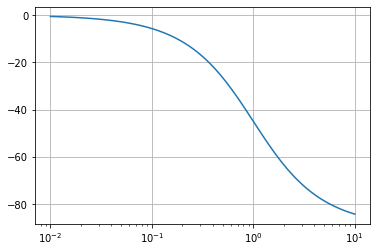

In [4]:
w, mag, phase = s1.bode()
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid()
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid()
plt.show()

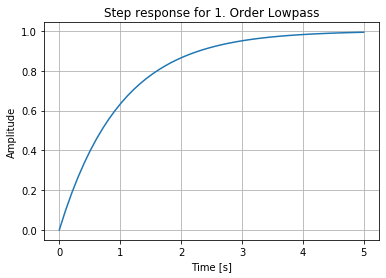

In [5]:
time = 5
t = np.linspace(0, time, num=50)
u = np.ones_like(t)
tout, y, x = signal.lsim(s1, u, t)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [6]:
te = tfest.tfest(u, y)

In [23]:
#NB H1 hypotesis not verified, this is just an example, fft should have been used
te.estimate(nzeros=0, npoles=1, init_value=1, method="fft", time=time, options={'xatol': 1e-4, 'disp': True}, l1=0.1)

Optimization terminated successfully.
         Current function value: 0.074623
         Iterations: 46
         Function evaluations: 91


 final_simplex: (array([[0.34247858, 0.50299102, 0.43070643],
       [0.34241155, 0.50300232, 0.43070676],
       [0.34239047, 0.50299885, 0.43069192],
       [0.34249718, 0.50300046, 0.43069646]]), array([0.07462309, 0.07463479, 0.07465429, 0.07468561]))
           fun: 0.07462308633595185
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 46
        status: 0
       success: True
             x: array([0.34247858, 0.50299102, 0.43070643])

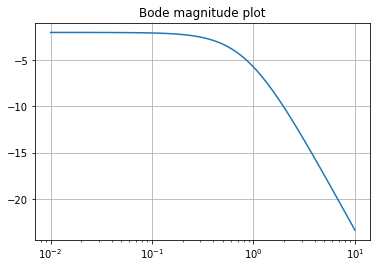

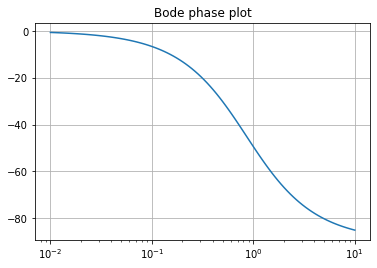

In [24]:
te.plot_bode()

In [9]:
te.get_transfer_function()

TransferFunctionContinuous(
array([0.2641383]),
array([1.        , 0.33217549]),
dt: None
)

/home/giulio/prog/.virtualenv/ML/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


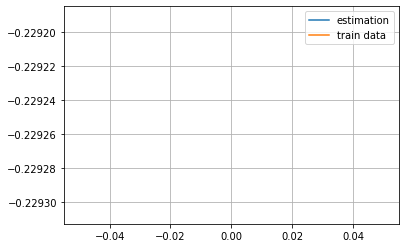

In [10]:
te.plot()